# Python for Finance - 7 - Sentiment Analysis and Exploration of Financial Texts

* Author: Cleiber Garcia
* Date: November/2023

* Goal: I taught myself how to use Python with financial data for making predictions. I put together this notebook while taking an online course called Python para Finanças ('Python for Finance') on Udemy, taught by Jones Granatyr (from IA Expert Academy). This notebook closely mirrors the one covered in class, with the effort I made to infuse my personal touch whenever possible and appropriate. I assure you that I meticulously wrote it line by line.

* Disclaimer: **Please be advised that all forecasts and patterns developed in the course of this training are 
intended solely for educational purposes. Under no circumstances should they be construed as 
investment advice.**

For more information please contact me at cleiber.garcia@gmail.com

# Summary
* [1. Initial Setup](#InitialSetup)
* [2. Preparing the Working Dataset](#PreparingWorkingDataset)
* [3. Visualizing and Exploring the Text Dataset](#VisualizingAndExploring)
* [4. Training and Testing the Classifier](#TrainingTestingClassifier)

# 1. Initial Setup <a id='InitialSetup'></a>

## 1.1 Installing and Importing Python Modules

In [1]:
# Installing spacy
!pip install spacy

     --------------------------------------- 12.1/12.1 MB 21.1 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 31.3 MB/s eta 0:00:00
     ------------------------------------- 395.8/395.8 kB 24.1 MB/s eta 0:00:00
     ------------------------------------- 481.9/481.9 kB 29.5 MB/s eta 0:00:00
     ---------------------------------------- 50.1/50.1 kB ? eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     -------------------------------------- 122.2/122.2 kB 7.5 MB/s eta 0:00:00
     ---------------------------------------- 45.9/45.9 kB ? eta 0:00:00
     ---------------------------------------- 2.0/2.0 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 6.6/6.6 MB 22.3 MB/s eta 0:00:00
     ---------------------------------------- 45.0/45.0 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.4.0
    Uninstalling typing_extensions-4.4.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.


In [2]:
!python -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.7.2                         
Location         C:\Users\Cleiber\anaconda3\lib\site-packages\spacy
Platform         Windows-10-10.0.19045-SP0     
Python version   3.10.9                        
Pipelines                                      



In [5]:
# Import spacy
import spacy

In [6]:
# Print spacy version
spacy.__version__

'3.7.2'

In [9]:
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
import random
import numpy as np
import re

[Summary](#Summary)

# 2. Preparing the Working Dataset <a id='PreparingWorkingDataset'></a>

## 2.1 Loading the Working Dataset

In [13]:
# Loading the working dataset
# Sentiment = 1: positive
# Sentiment = -1: negative
base = pd.read_csv('stock_data.csv')
base

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1
...,...,...
5786,Industry body CII said #discoms are likely to ...,-1
5787,"#Gold prices slip below Rs 46,000 as #investor...",-1
5788,Workers at Bajaj Auto have agreed to a 10% wag...,1
5789,"#Sharemarket LIVE: Sensex off day’s high, up 6...",1


In [18]:
# Count the number of unique sentiment
np.unique(base['Sentiment'], return_counts=True)

(array([-1,  1], dtype=int64), array([2106, 3685], dtype=int64))

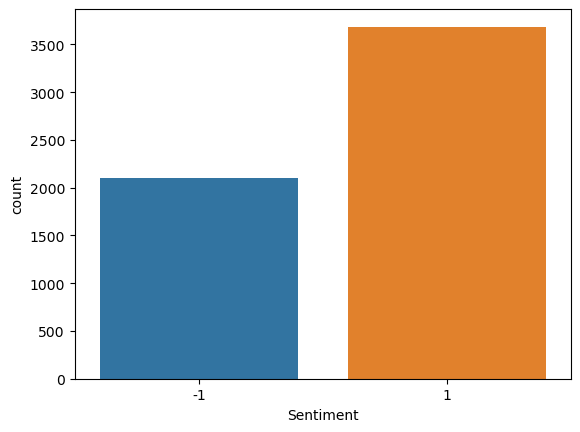

In [19]:
# Plot the sentiment distribution
sns.countplot(x=base['Sentiment']);

In [20]:
base.isnull().sum()

Text         0
Sentiment    0
dtype: int64

## 2.2 Text Pre-processing

### 2.2.1 Creating a Function for Text Pre-processing

In [23]:
!python -m spacy download pt

  Using cached https://github.com/explosion/spacy-models/releases/download/pt_core_news_sm-3.7.0/pt_core_news_sm-3.7.0-py3-none-any.whl (13.0 MB)
[!] As of spaCy v3.0, shortcuts like 'pt' are deprecated. Please use
the full pipeline package name 'pt_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [24]:
pln = spacy.load("pt_core_news_sm")
pln

In [25]:
from spacy.lang.pt.stop_words import STOP_WORDS

In [26]:
print(STOP_WORDS)

{'partir', 'oito', 'são', 'quarta', 'maior', 'ambas', 'desse', 'lhe', 'sétimo', 'mas', 'estou', 'das', 'esteve', 'estes', 'podia', 'entre', 'seria', 'teus', 'zero', 'fez', 'grande', 'cinco', 'naquele', 'fui', 'breve', 'estivestes', 'próxima', 'tendes', 'novas', 'um', 'vós', 'final', 'posso', 'adeus', 'devem', 'três', 'possível', 'embora', 'ser', 'cedo', 'quinto', 'tentar', 'somente', 'tal', 'como', 'vez', 'obrigada', 'segunda', 'vai', 'diante', 'inicio', 'onze', 'dezasseis', 'dentro', 'és', 'até', 'cada', 'está', 'do', 'vocês', 'comprido', 'outros', 'mil', 'porquanto', 'dez', 'cima', 'nível', 'porém', 'vários', 'apenas', 'terceiro', 'apoia', 'estão', 'apontar', 'irá', 'tivestes', 'tentaram', 'tarde', 'tempo', 'porquê', 'último', 'bom', 'cujo', 'nuns', 'põe', 'ora', 'usar', 'nova', 'deste', 'no', 'ao', 'dizer', 'fomos', 'faz', 'números', 'suas', 'sobre', 'terceira', 'poder', 'duas', 'obrigado', 'tiveste', 'elas', 'parece', 'eventual', 'seu', 'outra', 'momento', 'assim', 'aqueles', 'pôde

In [27]:
len(STOP_WORDS)

416

In [28]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [63]:
def preprocessamento(texto):
    texto = texto.lower()
    texto = re.sub(r"@[A-Za-z0-9$-_@.&+]+", ' ', texto)
    texto = re.sub(r"https?://[A-Za-z0-9./]+", ' ', texto)
    texto = re.sub(r" +", ' ', texto)
    
    documento = pln(texto)
    lista = []
    for token in documento:
        lista.append(token.lemma_)

    lista = [palavra for palavra in lista if palavra not in STOP_WORDS and palavra not in string.punctuation]
    lista = ' '.join([str(elemento) for elemento in lista if not elemento.isdigit()])

    return lista

In [64]:
preprocessamento('I will @test9&+ buy the https://www.iaexpert.academy Apple stock. 9 8 care. caring! car')

'i will buy the Apple stock care caring car'

### 2.2.2 Cleaning the Texts

In [65]:
base

,Text,Sentiment,tamanho
0,Kickers on my watchlist xide tit soq pnk cpw b...,1,89
1,user aap movier return the fea geed indicator ...,1,73
2,user i'd be afraid to short amzn they are look...,1,110
3,mntar over 12.00,1,16
4,oi over 21.37,1,13
...,...,...,...
5786,industry body cii said discoms are likely to S...,-1,121
5787,"goldr price slip Below rs 46,000 investors boo...",-1,116
5788,workers at bajaj auto haver agreed to Wage cut...,1,127
5789,sharemarket live sensex off day ’s high up poi...,1,122


In [66]:
base['Text'] = base['Text'].apply(preprocessamento)

In [67]:
base

,Text,Sentiment,tamanho
0,Kickers on my watchlist xide tit soq pnk cpw b...,1,89
1,user aap movier return The Fea geed indicator ...,1,73
2,user i'd be afraid to short amzn they are look...,1,110
3,mntar over 12.00,1,16
4,oi over 21.37,1,13
...,...,...,...
5786,industry body cii said discoms are likely to S...,-1,121
5787,"goldr price slip Below rs 46,000 investor book...",-1,116
5788,workers at bajaj auto haver agreed to Wage cut...,1,127
5789,sharemarket live sensex off day ’ s high up po...,1,122


[Summary](#Summary)

# 3. Visualizing and Exploring the Text Dataset <a id='VisualizingAndExploring'></a>

## 3.1 Average Number of Characters

In [68]:
base['tamanho'] = base['Text'].apply(len)
base.head()

,Text,Sentiment,tamanho
0,Kickers on my watchlist xide tit soq pnk cpw b...,1,89
1,user aap movier return The Fea geed indicator ...,1,74
2,user i'd be afraid to short amzn they are look...,1,110
3,mntar over 12.00,1,16
4,oi over 21.37,1,13


In [69]:
base['tamanho'].describe()

count    5791.000000
mean       70.241927
std        33.299862
min         3.000000
25%        43.000000
50%        69.000000
75%        96.000000
max       138.000000
Name: tamanho, dtype: float64

In [70]:
# Print statistics for positive sentiment
positivo = base[base['Sentiment'] == 1]
positivo['tamanho'].describe()

count    3685.000000
mean       69.455088
std        33.013560
min         4.000000
25%        42.000000
50%        69.000000
75%        94.000000
max       138.000000
Name: tamanho, dtype: float64

In [71]:
# Print statistics for negative sentiment
negativo = base[base['Sentiment'] == -1]
negativo['tamanho'].describe()

count    2106.000000
mean       71.618708
std        33.758770
min         3.000000
25%        46.000000
50%        70.000000
75%       101.000000
max       138.000000
Name: tamanho, dtype: float64

## 3.2 Creating a Cloud of Words

In [72]:
textos_positivos = positivo['Text'].tolist()
textos_positivos[:3]

['Kickers on my watchlist xide tit soq pnk cpw bpz aj trade method or method see prev posts',
 'user aap movier return The Fea geed indicator just trade the year awesomer',
 "user i'd be afraid to short amzn they are looking Like near-monopoly in ebooks and infrastructure-as-a-service"]

In [73]:
len(textos_positivos)

3685

In [74]:
textos_positivos_string = ' '.join(textos_positivos)
textos_positivos_string[:1000]

"Kickers on my watchlist xide tit soq pnk cpw bpz aj trade method or method see prev posts user aap movier return The Fea geed indicator just trade the year awesomer user i'd be afraid to short amzn they are looking Like near-monopoly in ebooks and infrastructure-as-a-service mntar over 12.00 oi over 21.37 pgnx over 3.04 goog owerr trend line channel test volume support aap Will Watch Tomorrow ong entry i'm assuming fcx opem tomorrow Above the 34.25 trigger Buy still very Much Like thi setup it really worries how everyone expects the Market to rallyr now usually exact oppositir happem every time we shall see soon bac Spx jpm aap gamco s arryrr haverty Apple is extremely cheap great video user maykiljil posted that i agree that msft is going higher possibly north of momentum is coming backr to etfc broke Ma200 resistance on solid volume friday ong set-up ha hitting 35.65 mean resume targeting level .. user gameplan shot today but i liked on trend break from may or c+h break oc Weekly tr

In [75]:
len(textos_positivos_string)

259626

In [76]:
!pip install wordcloud

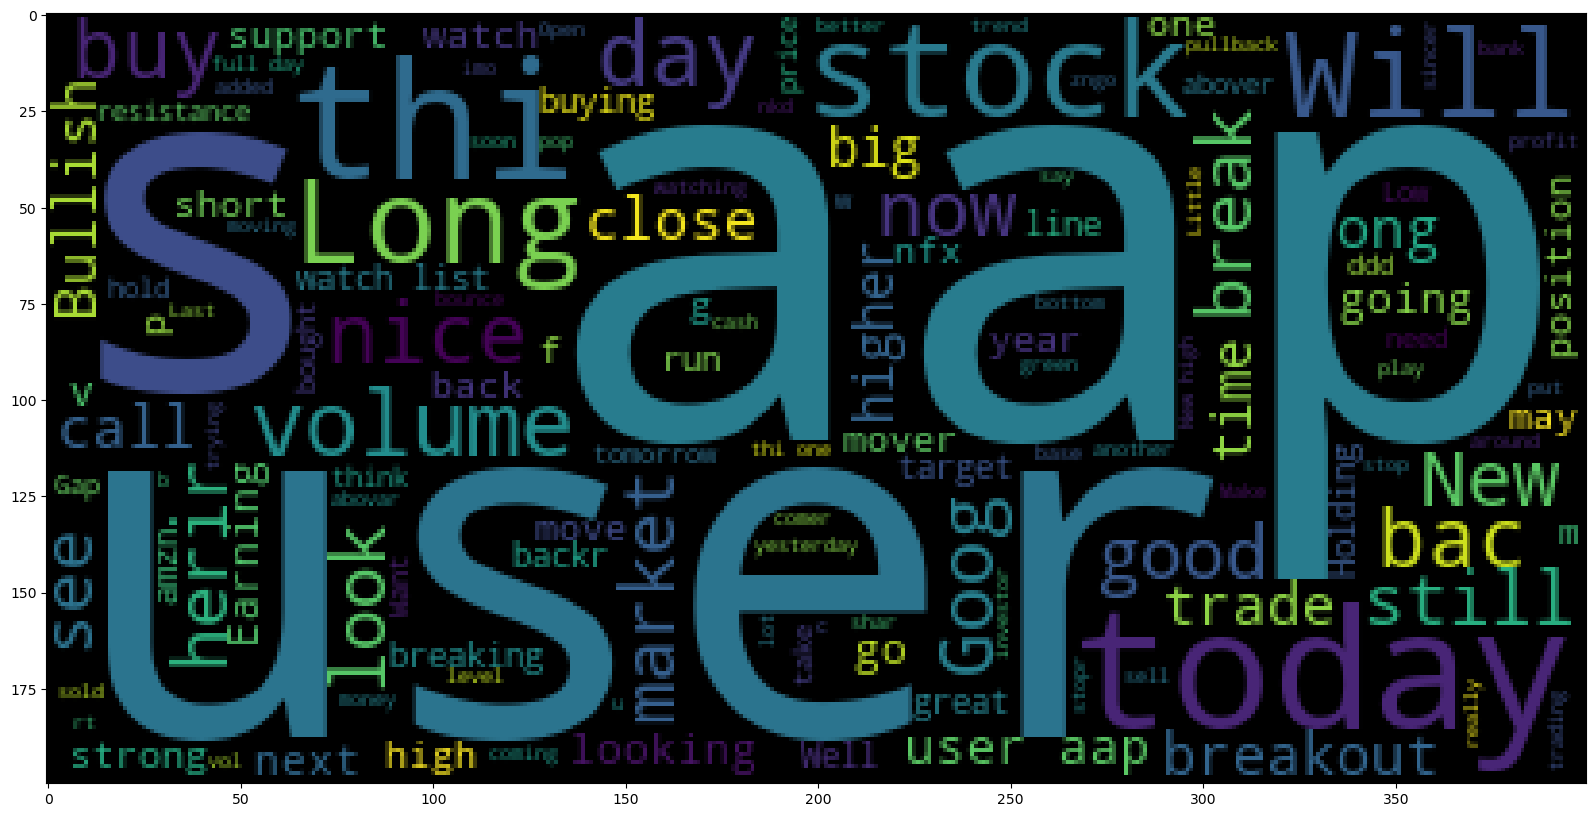

In [77]:
from wordcloud import WordCloud
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_positivos_string));

In [78]:
lista_negativo = negativo['Text'].tolist()
textos_negativos_string = ' '.join(lista_negativo)

In [79]:
len(textos_negativos_string)

152934

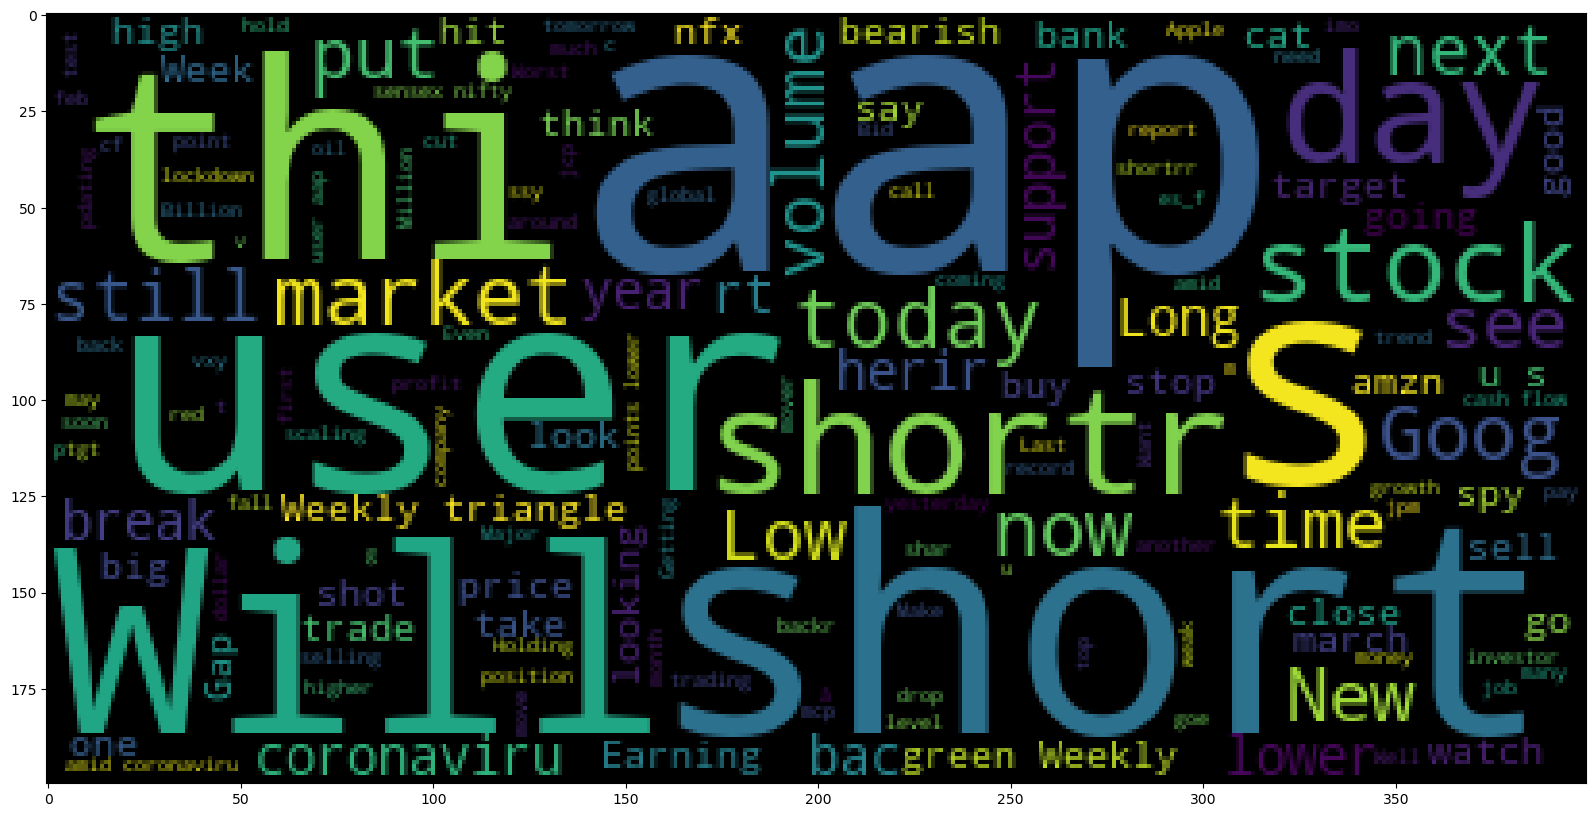

In [80]:
plt.figure(figsize=(20,10))
plt.imshow(WordCloud().generate(textos_negativos_string));

## 3.3 Extracting Named Entities

- Siglas: https://spacy.io/api/annotation#named-entities

In [84]:
from spacy import displacy

In [85]:
documento = pln(textos_positivos_string)
displacy.render(documento, style = 'ent', jupyter = True)

In [86]:
empresas_positivas = []
for entidade in documento.ents:
    if entidade.label_ == 'ORG':
        print(entidade.text, entidade.label_)
        empresas_positivas.append(entidade.text)

Weekly ORG
Bullish ORG
Figure Bullish ORG
When ORG
All ORG
Make New ORG
unthreatened unless ORG
Spx stock ORG
Dynamic ORG
When ORG
gm i think thi is ORG
yep mnst ORG
When ORG
on Flag ORG
Bullish ORG
Small risk position ORG
5,300 of the feb ORG
Conference ORG
held support to close ORG
Bullish ORG
Above Bull Flag ORG
us perk ORG
the stockr slowly ong ORG
Judge ORG
Dealer association ORG
is ORG
Gnmk jds ORG
our ive ORG
added ORG
to Million ORG
csn option ORG
green monthlyr triangle on acad .... ORG
is Crossing ORG
Uptrend Still ORG
New highs still holding needs volume herir voc actually triggerd ORG
When ORG
Basing ORG
Beav ORG
Gdot Making New ORG
sumir strength might actually jump in ORG
Staying ORG
or 28.40 zc ORG
the averages help thi ORG
New uptrend Starting user ORG
green day in ORG
green day in ORG
linar after ORG
Fb leadr un to ORG
apple stock ORG
breakoutr aap drops ORG
All ORG
Bullish ORG
Bastard ORG
The accumulation ORG
Leverage Highest ORG
is perking up again very strong ORG
Ne

In [87]:
len(empresas_positivas)

467

In [88]:
empresas_positivas = set(empresas_positivas)

In [89]:
len(empresas_positivas)

370

In [90]:
print(empresas_positivas)

{'Fears linger', 'investmentsâ€ ™', 'unthreatened unless', 'Uptrend Still', 'squeez', 'yes bank stock set to', '-8.90 Magic', 'Cerner', 'Earnings but to after :) down from', 'would solve thi', 'stz', 'With New', 'Legs', 'number of call and put', 'Dealer association', 'Which Way', 'Above downtrend', 'jinxing myself ...', 'Staying', 'New Floor1600 gaz co and', 'More', 'Apple gets', 'Time start uptrend to fill', 'Sears', 'Markets', 'New stockr in my adar just now mti user ong in ng after', 'the Pandemic', 'Loss', 'gmc cst kwk thi', 'Knife', 'The accumulation', 'Announce Was', 'hammering out bottom herir at its ma', 'Friend in', 'Sachs', 'Got', 'h+s', 'covid-19-hit small business likely', 'sumir strength might actually jump in', 'sa Clothing', 'bank of China', 'Nothing Bearish in any of these', 'wk stock aap to Many People', '5,300 of the feb', 'the breakoutr updated', 'the interest', 'Mgm', 'wynn ibm', 'breakoutr aap drops', 'Mgm Breakout', 'Wonder how many jumped on The', 'Bullish', 'sta

In [91]:
empresas_negativas = []
documento = pln(textos_negativos_string)
for entidade in documento.ents:
    if entidade.label_ == 'ORG':
        print(entidade.text, entidade.label_)
        empresas_negativas.append(entidade.text)

yoy ORG
American international group option ORG
New Sony ORG
Little ORG
now aap might ORG
the Lows of the day bears ORG
Kutcher stars in jobs Kinda Like how facebook ORG
When ORG
When ORG
Nvda ORG
Bullish but it ORG
Slashing ORG
Showed thi ma on friday ORG
call spreads in march big bet that stock Will be Below ORG
Million Million ORG
from vacation ORG
gmc ORG
Borders and some ackspace ORG
Weekly ORG
Weekly ORG
Weekly ORG
ayi ORG
air under stock until ORG
Million ORG
is ORG
feb26p ORG
vs. ORG
Nothing but air till 17.90s tol ORG
Hedge ORG
april and strikes ORG
Week ORG
Weekly ORG
being slashed squeezed stock crash ORG
New shortr on board utility ORG
Weekly ORG
Yhoo ORG
kiss of death ORG
Wedge ORG
Mkt share to Jds ORG
the stock nickname ORG
biz ORG
Weekly ORG
Weekly ORG
Apple ORG
green monthlyr triangle ORG
Short ORG
profits aap appears to be dragging down qqq and spy Stockaction ook how Long ORG
the rare ORG
the stock ORG
Western World Will ORG
morn Data.its ORG
off csn .... ORG
Weekly O

In [92]:
empresas_negativas = set(empresas_negativas)
len(empresas_negativas)

240

In [93]:
print(empresas_negativas)

{'Wall', 'New Low Well', 'Fears linger', 'Extend losses to fourth day in', 'caterpillar machine etail sales drop', 'Fears persist sensex nifty', 'the company', 'thank aap aap will', 'South More', 'hedge and definir risk ...', 'company its', 'green with', 'csn', 'user aap how comer the spy goes', 'South', 'Large and Surprising', 'Kept', 'Who', 'When Comes', 'now after being upgraded from sell to neutral sell signal', 'Below its', 'its business', 'the record', 'Suggesting', 'Bid', 'Strong company', 'Conference', 'Whose', 'Investments Including', 'Borders and some ackspace', 'Bearish', 'Little Earnings Boost and i stopped out but the Macd', 'Million Million', 'now aap might', 'Keepr', 'Grocery tycoon kishore', 'value stock need go', 'hitting its', 'Leading spy up and down user', 'Spooks', 'The u.s stock', 'Makes', 'Probably treasury bill aap', 'Borders inc and apparel', 'American international group option', 'We', 'casinosâ€ ™', 'Mark Against', 'green monthlyr triangle', 'Sabotage who', '

In [94]:
# Print companies that are both rated positive and negative
empresas_positivas_negativas = empresas_positivas.intersection(empresas_negativas)

In [95]:
len(empresas_positivas_negativas)

33

In [97]:
# Print companies rated positive only
empresas_somente_positivas = empresas_positivas.difference(empresas_negativas)
print(empresas_somente_positivas)

{'investmentsâ€ ™', 'unthreatened unless', 'Uptrend Still', 'squeez', 'yes bank stock set to', '-8.90 Magic', 'Cerner', 'would solve thi', 'Earnings but to after :) down from', 'stz', 'With New', 'Legs', 'number of call and put', 'Dealer association', 'Which Way', 'Above downtrend', 'jinxing myself ...', 'Setting', 'Staying', 'New Floor1600 gaz co and', 'More', 'Apple gets', 'Time start uptrend to fill', 'Sears', 'New stockr in my adar just now mti user ong in ng after', 'the Pandemic', 'Loss', 'gmc cst kwk thi', 'Knife', 'The accumulation', 'Announce Was', 'hammering out bottom herir at its ma', 'Friend in', 'Sachs', 'Got', 'h+s', 'covid-19-hit small business likely', 'sumir strength might actually jump in', 'sa Clothing', 'bank of China', 'Nothing Bearish in any of these', 'wk stock aap to Many People', '5,300 of the feb', 'the breakoutr updated', 'the interest', 'wynn ibm', 'breakoutr aap drops', 'Mgm Breakout', 'Wonder how many jumped on The', 'stanley Initiate', 'The shorts', 'of 

In [99]:
len(set(empresas_somente_positivas))

337

In [101]:
# Print companies rated negative only
empresas_somente_negativas = empresas_negativas.difference(empresas_positivas)
print(empresas_somente_negativas)

{'Wall', 'New Low Well', 'Extend losses to fourth day in', 'caterpillar machine etail sales drop', 'Fears persist sensex nifty', 'the company', 'thank aap aap will', 'South More', 'hedge and definir risk ...', 'company its', 'green with', 'user aap how comer the spy goes', 'South', 'Large and Surprising', 'Kept', 'When Comes', 'now after being upgraded from sell to neutral sell signal', 'Below its', 'its business', 'the record', 'Suggesting', 'Strong company', 'Whose', 'Investments Including', 'Borders and some ackspace', 'Bearish', 'Little Earnings Boost and i stopped out but the Macd', 'Million Million', 'now aap might', 'Long bby Nok pphm ike i said jump', 'Keepr', 'Grocery tycoon kishore', 'value stock need go', 'hitting its', 'Leading spy up and down user', 'Spooks', 'The u.s stock', 'Probably treasury bill aap', 'Borders inc and apparel', 'American international group option', 'We', 'casinosâ€ ™', 'Mark Against', 'green monthlyr triangle', 'Sabotage who', 'American business', 'cu

In [103]:
len(empresas_somente_negativas)

207

[Summary](#Summary)

# 4. Training and Testing the Classifier <a id='TrainingTestingClassifier'></a>

## 4.1 Preparing the Text Dataset

In [104]:
base.drop(['tamanho'], axis = 1, inplace = True)

In [105]:
base

,Text,Sentiment
0,Kickers on my watchlist xide tit soq pnk cpw b...,1
1,user aap movier return The Fea geed indicator ...,1
2,user i'd be afraid to short amzn they are look...,1
3,mntar over 12.00,1
4,oi over 21.37,1
...,...,...
5786,industry body cii said discoms are likely to S...,-1
5787,"goldr price slip Below rs 46,000 investor book...",-1
5788,workers at bajaj auto haver agreed to Wage cut...,1
5789,sharemarket live sensex off day ’ s high up po...,1


In [106]:
from sklearn.model_selection import train_test_split
base_treinamento, base_teste = train_test_split(base, test_size = 0.3)

In [107]:
base_treinamento.shape

(4053, 2)

In [108]:
base_teste.shape

(1738, 2)

In [109]:
exemplo_base_dados = [["este trabalho é agradável", {"POSITIVO": True, "NEGATIVO": False}],
                      ["este lugar continua assustador", {"POSITIVO": False, "NEGATIVO": True}]]

In [110]:
base_treinamento_final = []
for texto, sentimento in zip(base_treinamento['Text'], base_treinamento['Sentiment']):
    if sentimento == 1:
        dic = ({'POSITIVO': True, 'NEGATIVO': False})
    elif sentimento == -1:
        dic = ({'POSITIVO': False, 'NEGATIVO': True})
    base_treinamento_final.append([texto, dic.copy()])

In [112]:
base_treinamento_final

[['ooks ready to Make New highs 9&20 sma are both rising W s trading Above ther breakout over 6.22',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ["evc user Missyaubaby i'm short from ytd and today",
  {'POSITIVO': False, 'NEGATIVO': True}],
 ["user aap matter What stock does tomorrow i'm not selling tie Knot and hang in there",
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['aap Will top out in april when aston Kutcher stars in jobs Kinda Like how facebook did When social network came out fb',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['user emn Eastman stoploss in 72.31 after beating 72.98',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ['when We drop expecting 8-10 correction Spx es_f spy qqq iwm ndx aap',
  {'POSITIVO': False, 'NEGATIVO': True}],
 ['joe Holding that 21-21.50 areo now but longer-term trend endangered',
  {'POSITIVO': True, 'NEGATIVO': False}],
 ["didn't plan on Holding theser msft apr calls overnight again but when things ever go planned",
  {'POSITIVO': True, 'NEGATIVO': 

In [113]:
len(base_treinamento_final)

4053

## 4.2 Creating the Classifier

In [114]:
modelo = spacy.blank('en')
textcat = modelo.add_pipe("textcat")
textcat.add_label('POSITIVO')
textcat.add_label('NEGATIVO')
historico = []

In [121]:
from spacy.training import Example

In [122]:
len(base_treinamento_final)

4053

In [123]:
print(len(base_treinamento_final) / 512)

7.916015625


In [116]:
modelo.begin_training()
for epoca in range(5):
    random.shuffle(base_treinamento_final)
    losses = {}
    for batch in spacy.util.minibatch(base_treinamento_final, 512):
        textos = [modelo(texto) for texto, entities in batch]
        annotations = [{'cats': entities} for texto, entities in batch]
        examples = [Example.from_dict(doc, annotation) for doc, annotation in zip(
            textos, annotations
        )]
        modelo.update(examples, losses=losses)
        historico.append(losses)
    if epoca % 1 == 0:
        print(losses)

{'textcat': 1.8827760219573975}
{'textcat': 1.5565732717514038}
{'textcat': 1.069759078323841}
{'textcat': 0.5618247985839844}
{'textcat': 0.20481544733047485}


In [117]:
historico_erro = []
for i in historico:
    historico_erro.append(i.get('textcat'))

In [118]:
historico_erro = np.array(historico_erro)
historico_erro

array([1.88277602, 1.88277602, 1.88277602, 1.88277602, 1.88277602,
       1.88277602, 1.88277602, 1.88277602, 1.55657327, 1.55657327,
       1.55657327, 1.55657327, 1.55657327, 1.55657327, 1.55657327,
       1.55657327, 1.06975908, 1.06975908, 1.06975908, 1.06975908,
       1.06975908, 1.06975908, 1.06975908, 1.06975908, 0.5618248 ,
       0.5618248 , 0.5618248 , 0.5618248 , 0.5618248 , 0.5618248 ,
       0.5618248 , 0.5618248 , 0.20481545, 0.20481545, 0.20481545,
       0.20481545, 0.20481545, 0.20481545, 0.20481545, 0.20481545])

Text(0, 0.5, 'Erro')

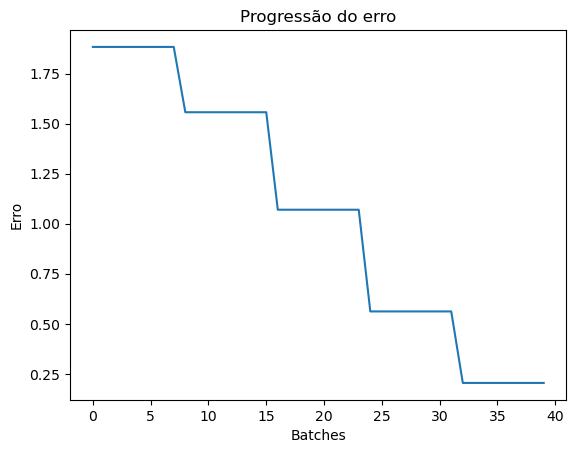

In [119]:
import matplotlib.pyplot as plt
plt.plot(historico_erro)
plt.title('Progressão do erro')
plt.xlabel('Batches')
plt.ylabel('Erro')

In [120]:
modelo.to_disk('modelo_classif_texto_positivo_negativo')

## 4.3 Testing the Model

In [124]:
modelo_carregado = spacy.load('modelo_classif_texto_positivo_negativo')
modelo_carregado

In [134]:
base_teste.head(10)

,Text,Sentiment
3434,Anth today Was great entry point huge insider ...,1
338,Fin 9mos operational cash flow decline 15milli...,-1
1219,tso is on good upward run but resistance level...,1
3205,hd busted hod,1
4187,pkt long 13.51,1
172,Goog is Getting fueled by aap s reversal,1
5783,"reliancer industrie raises rs 8,500 crore usin...",1
5749,crude oil falls thirdr straight day set Worst ...,-1
3933,nkd down days in last going to Wear off the ov...,1
2775,cs you can say whatever you Like About The 6mo...,-1


### 4.3.1 Testing with a Positive Text

In [131]:
texto_positivo = base_teste['Text'][3434]

In [132]:
previsao = modelo_carregado(texto_positivo)
previsao

Anth today Was great entry point huge insider and institutional bought herir just Recapitalized high target price ong

In [133]:
previsao.cats

{'POSITIVO': 0.9979682564735413, 'NEGATIVO': 0.0020317197777330875}

### 4.3.2 Testing with a Negative Text

In [135]:
base_teste

,Text,Sentiment
3434,Anth today Was great entry point huge insider ...,1
338,Fin 9mos operational cash flow decline 15milli...,-1
1219,tso is on good upward run but resistance level...,1
3205,hd busted hod,1
4187,pkt long 13.51,1
...,...,...
5261,oil price fell Monday paring some of their rec...,-1
4906,milwaukee s cat to lay off employees in so mke...,-1
5182,oil Futur have ralliedrr over the past Week li...,1
5396,operator of traffic camera is in trouble fewer...,-1


In [141]:
texto_negativo = base_teste['Text'][5261]
texto_negativo

'oil price fell Monday paring some of their recent rebound after virtual summit producer to discuss supplyâ€ ¦ g'

In [142]:
previsao = modelo_carregado(texto_negativo)
previsao.cats

{'POSITIVO': 0.0989585593342781, 'NEGATIVO': 0.9010415077209473}

## 4.4 Evaluating the Model

In [143]:
previsoes = []
for texto in base_teste['Text']:
    #print(texto)
    previsao = modelo_carregado(texto)
    previsoes.append(previsao.cats)

In [151]:
previsoes[:10]

[{'POSITIVO': 0.9979682564735413, 'NEGATIVO': 0.0020317197777330875},
 {'POSITIVO': 0.07564708590507507, 'NEGATIVO': 0.9243528842926025},
 {'POSITIVO': 0.9922926425933838, 'NEGATIVO': 0.007707377430051565},
 {'POSITIVO': 0.9576295614242554, 'NEGATIVO': 0.04237045347690582},
 {'POSITIVO': 0.9996834993362427, 'NEGATIVO': 0.00031654280610382557},
 {'POSITIVO': 0.05869367718696594, 'NEGATIVO': 0.9413063526153564},
 {'POSITIVO': 0.7490605711936951, 'NEGATIVO': 0.25093939900398254},
 {'POSITIVO': 0.017728716135025024, 'NEGATIVO': 0.9822713136672974},
 {'POSITIVO': 0.13385875523090363, 'NEGATIVO': 0.8661412000656128},
 {'POSITIVO': 0.9824751019477844, 'NEGATIVO': 0.01752488687634468}]

In [150]:
len(previsoes)

1738

In [153]:
previsoes_final = []
for previsao in previsoes:
    if previsao['POSITIVO'] > previsao['NEGATIVO']:
        previsoes_final.append(1)
    else:
        previsoes_final.append(-1)
previsoes_final = np.array(previsoes_final)

In [154]:
previsoes_final, np.unique(previsoes_final)

(array([ 1, -1,  1, ...,  1, -1,  1]), array([-1,  1]))

In [155]:
respostas_reais = base_teste['Sentiment'].values
respostas_reais

array([ 1, -1,  1, ...,  1, -1,  1], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(respostas_reais, previsoes_final)

0.7566168009205984

In [157]:
cm = confusion_matrix(respostas_reais, previsoes_final)
cm

array([[374, 264],
       [159, 941]], dtype=int64)

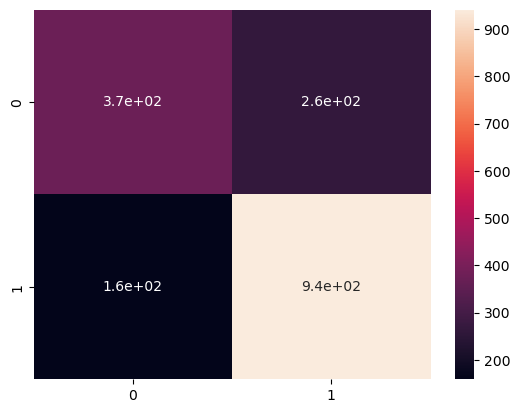

In [158]:
sns.heatmap(cm, annot=True);

In [159]:
print(classification_report(respostas_reais, previsoes_final))

              precision    recall  f1-score   support

          -1       0.70      0.59      0.64       638
           1       0.78      0.86      0.82      1100

    accuracy                           0.76      1738
   macro avg       0.74      0.72      0.73      1738
weighted avg       0.75      0.76      0.75      1738



[Summary](#Summary)